In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

from torch import nn
import torch.nn.functional as F
from torch import optim

import torch
import matplotlib.pyplot as plt

import helper

from torchvision import datasets, transforms

In [2]:
#define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5,0.5),
                                                   (0.5, 0.5, 0.5))
                               ])
#download the training set data
trainset = datasets.FashionMNIST('images/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

#download test set data
testset = datasets.FashionMNIST('images/F_MNIST_data/', download=True, train = False, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=64, shuffle=True)

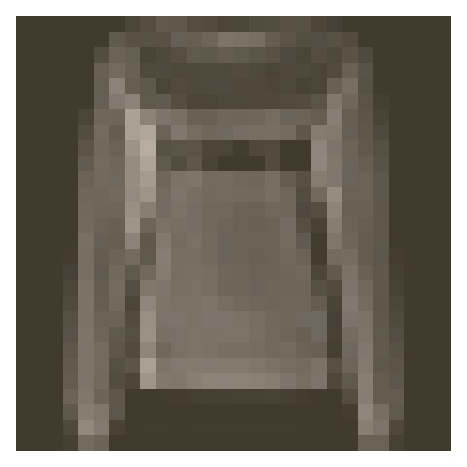

In [3]:
# To see the image
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [4]:
#Define the network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        #flatten the image
        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

In [6]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [8]:
model.parameters

<bound method Module.parameters of Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)>

In [12]:
#Train the network
epochs = 30
step = 0

train_losses, test_losses = [],[]
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss =0
        accuracy = 0
        
        #turn off gradients, to save memory for validation
        
        with torch.no_grad():
            for images,labels in testloader:
                output = model(images)
                test_loss += criterion(output,labels)
                
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
        

Epoch: 1/30..  Training Loss: 0.394..  Test Loss: 0.377..  Test Accuracy: 0.867
Epoch: 2/30..  Training Loss: 0.354..  Test Loss: 0.392..  Test Accuracy: 0.854
Epoch: 3/30..  Training Loss: 0.334..  Test Loss: 0.364..  Test Accuracy: 0.871
Epoch: 4/30..  Training Loss: 0.315..  Test Loss: 0.373..  Test Accuracy: 0.872
Epoch: 5/30..  Training Loss: 0.300..  Test Loss: 0.443..  Test Accuracy: 0.850
Epoch: 6/30..  Training Loss: 0.291..  Test Loss: 0.362..  Test Accuracy: 0.872
Epoch: 7/30..  Training Loss: 0.281..  Test Loss: 0.387..  Test Accuracy: 0.873
Epoch: 8/30..  Training Loss: 0.275..  Test Loss: 0.369..  Test Accuracy: 0.874
Epoch: 9/30..  Training Loss: 0.263..  Test Loss: 0.379..  Test Accuracy: 0.874
Epoch: 10/30..  Training Loss: 0.256..  Test Loss: 0.350..  Test Accuracy: 0.880
Epoch: 11/30..  Training Loss: 0.246..  Test Loss: 0.367..  Test Accuracy: 0.876
Epoch: 12/30..  Training Loss: 0.243..  Test Loss: 0.358..  Test Accuracy: 0.876
Epoch: 13/30..  Training Loss: 0.245.

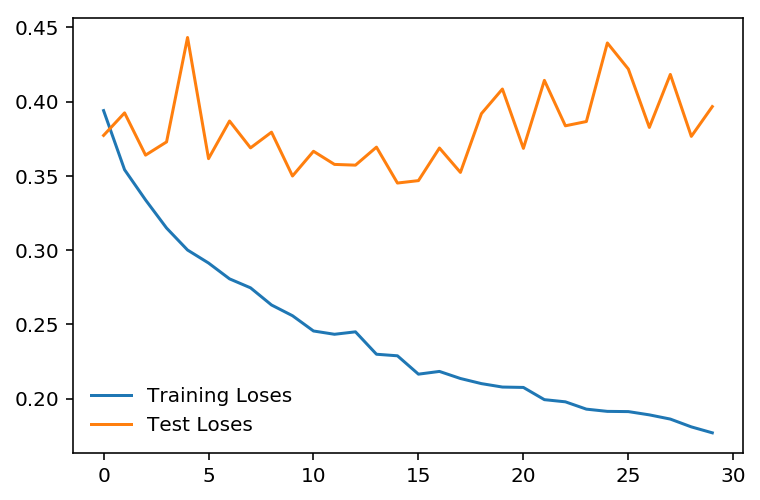

In [14]:
plt.plot(train_losses, label = 'Training Loses')
plt.plot(test_losses, label = 'Test Loses')
plt.legend(frameon=False)